In [2]:
import pandas as pd

athletes = pd.read_csv('data/athlete_events.csv')
# Count how many unique occurences of countries and sports are there
print(f"# of countires: {len(athletes['NOC'].unique())}")
print(f"# of sports: {len(athletes['Sport'].unique())}")
print(f"# of events: {len(athletes['Event'].unique())}")
print(f"# of athletes: {len(athletes['Name'].unique())}")
athletes.head()

# of countires: 230
# of sports: 66
# of events: 765
# of athletes: 134732


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
columns_of_interest = ['Height', 'Weight','Age']
aggregations = ['min', 'max']
for sex in ['M', 'F']:
    extrema_by_sport = pd.DataFrame(index=athletes['Sport'].unique())
    extrema_by_sport.sort_index(inplace=True)
    for column in columns_of_interest:
        by_sex = athletes[athletes['Sex'] == sex]
        no_nans = by_sex.dropna(subset=column)
        for aggregation in aggregations:
            new_column_name = column + '_' + aggregation
            extrema_by_sport[new_column_name] = no_nans.groupby(['Sport']).agg({column:aggregation})
    extrema_by_sport.to_csv('data/extrema_' + sex + '.csv', index=True, header=True)

In [4]:
extrema_male = pd.read_csv('data/extrema_M.csv', index_col=[0])
extrema_female = pd.read_csv('data/extrema_F.csv', index_col=[0])
extrema_male.head()

,Height_min,Height_max,Weight_min,Weight_max,Age_min,Age_max
Aeronautics,NaN,NaN,NaN,NaN,26.0,26.0
Alpine Skiing,142.0,200.0,50.0,107.0,14.0,55.0
Alpinism,NaN,NaN,NaN,NaN,22.0,57.0
Archery,157.0,197.0,46.0,130.0,15.0,71.0
Art Competitions,150.0,190.0,59.0,93.0,14.0,97.0


In [5]:
extrema_female.head()

,Height_min,Height_max,Weight_min,Weight_max,Age_min,Age_max
Aeronautics,NaN,NaN,NaN,NaN,NaN,NaN
Alpine Skiing,152.0,187.0,45.0,90.0,14.0,45.0
Alpinism,NaN,NaN,NaN,NaN,43.0,43.0
Archery,152.0,185.0,42.0,95.0,14.0,63.0
Art Competitions,160.0,160.0,NaN,NaN,17.0,74.0


In [6]:
data_for_plots = {'Height': [], 'Weight': [], 'Age': []}
for extrema in [extrema_female, extrema_male]:
    for column in extrema.columns:
        feature, aggregation = column.split('_')
        if aggregation == 'min':
            extreme_value = extrema[column].min(skipna=True)
        else:
            extreme_value = extrema[column].max(skipna=True)
        sport = extrema[extrema[column] == extreme_value].index[0]
        data_for_plots[feature].append((sport, extreme_value))
data_for_plots

{'Height': [('Gymnastics', 127.0),
  ('Basketball', 213.0),
  ('Boxing', 127.0),
  ('Basketball', 226.0)],
 'Weight': [('Gymnastics', 25.0),
  ('Weightlifting', 167.0),
  ('Football', 28.0),
  ('Judo', 214.0)],
 'Age': [('Figure Skating', 11.0),
  ('Art Competitions', 74.0),
  ('Gymnastics', 10.0),
  ('Art Competitions', 97.0)]}

In [7]:
female = data_for_plots['Height'][:2]
male = data_for_plots['Height'][-2:]
print(f"Female data: {female}")
print(f"Male data: {male}")

Female data: [('Gymnastics', 127.0), ('Basketball', 213.0)]
Male data: [('Boxing', 127.0), ('Basketball', 226.0)]


In [8]:
sports_female, data_female = zip(*female)
sports_male, data_male = zip(*male)
labels = sports_male + sports_female
labels

('Boxing', 'Basketball', 'Gymnastics', 'Basketball')

Boxing
Basketball
Gymnastics
Basketball


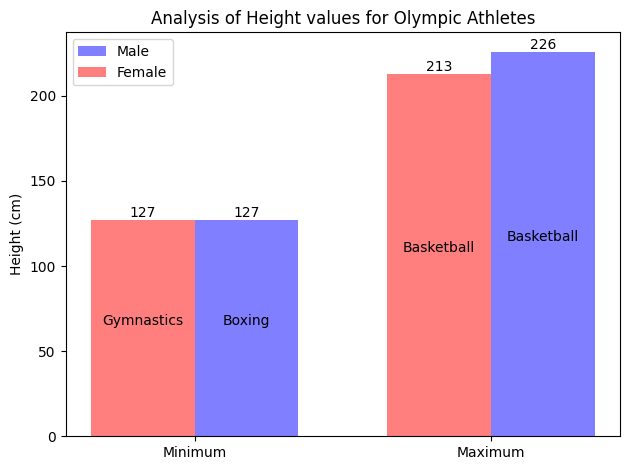

In [9]:
import matplotlib.pyplot as plt
import numpy as np

opacity = 0.5
bar_width = 0.35

bar1 = plt.bar(np.arange(len(data_male)) + bar_width, data_male, bar_width, align='center', alpha=opacity, color='b', label='Male')
bar2 = plt.bar(range(len(data_female)), data_female, bar_width, align='center', alpha=opacity, color='r', label='Female')

# Add the sports for each bar and the height
for rect, label in zip(bar1 + bar2, labels):
    print(label)
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() /2.0, height / 2.0, label, ha='center', va='bottom')
    plt.text(rect.get_x() + rect.get_width() /2.0, height, f'{height:.0f}', ha='center', va='bottom')


plt.legend()
plt.ylabel('Height (cm)')
plt.title('Analysis of Height values for Olympic Athletes')
plt.xticks([bar_width/2.0, 1 + bar_width/2.0],('Minimum', 'Maximum'))
plt.tight_layout()
plt.show()

In [10]:
# Check values
athletes[athletes['Height'] == 127.0]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
29333,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Individual All-Around,NaN
29334,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Team All-Around,NaN
29335,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Floor Exercise,NaN
29336,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Horse Vault,NaN
29337,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Uneven Bars,NaN
29338,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Balance Beam,NaN
164821,82769,Lyton Levison Mphande,M,25.0,127.0,62.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,NaN


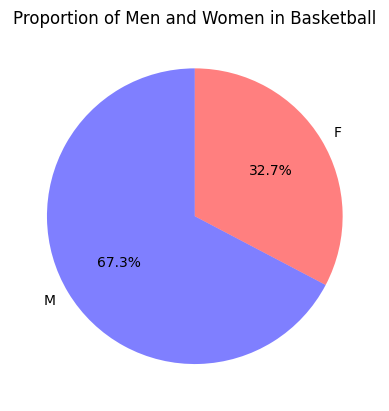

In [148]:
# See gender balance in Basketball
# Filter DataFrame for Basketball records
basketball_df = athletes[athletes['Sport'] == 'Basketball'].drop_duplicates(["ID"]).dropna(subset=['Height'])

# Count the number of occurrences of each gender in the filtered DataFrame
gender_counts = basketball_df['Sex'].value_counts()

# Create a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['b', 'r'], wedgeprops=dict(alpha=opacity))
plt.title('Proportion of Men and Women in Basketball')
plt.show()


In [149]:
# Get minimum and maximum height for basketball athletes to define the interval
print(f'The tallest athlete in basketball is {basketball_df['Height'].max()} cm tall. ({basketball_df['Height'].max()-basketball_df['Height'].mean():.2f} cm taller than average).'  )
print(f'The shortest athlete in basketball is {basketball_df['Height'].min()} cm tall. ({basketball_df['Height'].mean()-basketball_df['Height'].min():.2f} cm taller than average).')
print(f'The interval for height distribution is: [{basketball_df['Height'].min() // 10 * 10} ; {basketball_df['Height'].max() // 10 * 10 + 10}]')

The tallest athlete in basketball is 226.0 cm tall. (35.74 cm taller than average).
The shortest athlete in basketball is 161.0 cm tall. (29.26 cm taller than average).
The interval for height distribution is: [160.0 ; 230.0]


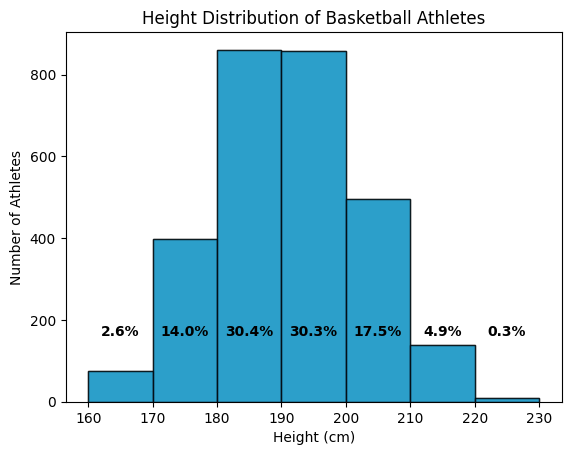

In [150]:
# Define the height intervals
height_intervals = range(160, 240, 10)

# Create a histogram
plt.hist(basketball_df['Height'], bins=height_intervals, 
         edgecolor='black', alpha=0.7, color='cyan')
n, bins, patches = plt.hist(basketball_df['Height'], 
                            bins=height_intervals, edgecolor='black', alpha=0.7)

# Set labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Number of Athletes')
plt.title('Height Distribution of Basketball Athletes')

# Add percentage labels

total_athletes = len(basketball_df)
for percentage, interval, patch in zip(n / total_athletes * 100, bins[:-1], patches):
    plt.text(patch.get_x() + patch.get_width() / 2, 170, f'{percentage:.1f}%', 
             ha='center', va='center', color='black', fontweight='bold')

# Show the plot
plt.show()

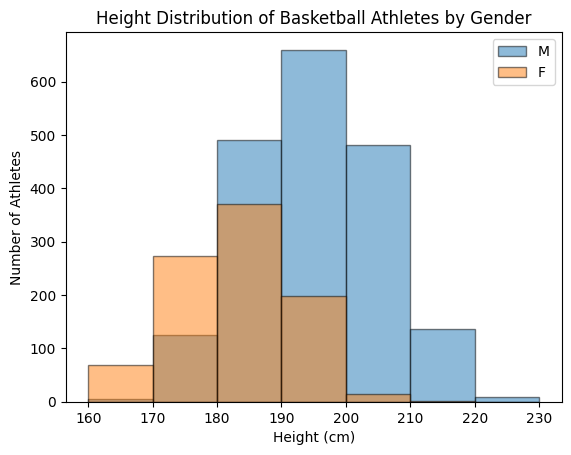

In [151]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create histograms for each gender
for gender in basketball_df['Sex'].unique():
    gender_data = basketball_df[basketball_df['Sex'] == gender]
    n, bins, patches = ax.hist(gender_data['Height'], bins=height_intervals, edgecolor='black', alpha=0.5, label=gender)

# Set labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Number of Athletes')
plt.title('Height Distribution of Basketball Athletes by Gender')

# Show legend
plt.legend()

# Show the plot
plt.show()

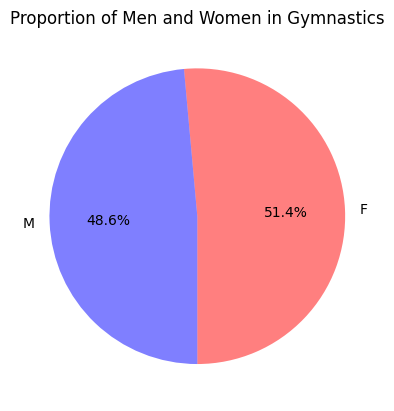

In [152]:
# See gender balance in Gymnastics
# Filter DataFrame for Gymnasticsl records
gymnastics_df = athletes[athletes['Sport'] == 'Gymnastics'].drop_duplicates(["ID"]).dropna(subset=['Height'])

# Count the number of occurrences of each gender in the filtered DataFrame
gender_counts = gymnastics_df['Sex'].value_counts()


# Create a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=270, colors=['r', 'b'], wedgeprops=dict(alpha=opacity))
plt.title('Proportion of Men and Women in Gymnastics')
plt.show()

In [153]:
# Get minimum and maximum height for gymnastics athletes to define the interval
print(f'The tallest athlete in gymnastics is {gymnastics_df['Height'].max()} cm tall. ({gymnastics_df['Height'].max()-gymnastics_df['Height'].mean():.2f} cm taller than average).')
print(f'The shortest athlete in gymnastics is {gymnastics_df['Height'].min()} cm tall. ({gymnastics_df['Height'].mean()-gymnastics_df['Height'].min():.2f} cm shorter than average).')
print(f'The interval for height distribution is: [{gymnastics_df['Height'].min() // 10 * 10} ; {gymnastics_df['Height'].max() // 10 * 10 + 10}]')


The tallest athlete in gymnastics is 188.0 cm tall. (26.43 cm taller than average).
The shortest athlete in gymnastics is 127.0 cm tall. (34.57 cm shorter than average).
The interval for height distribution is: [120.0 ; 190.0]


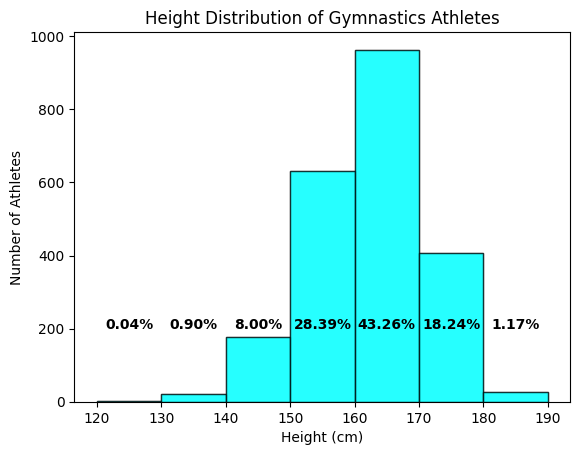

In [154]:
# Define the height intervals
height_intervals = range(120, 200, 10)

# Create a histogram
plt.hist(gymnastics_df['Height'], bins=height_intervals, edgecolor='black', alpha=0.5, color='cyan')
n, bins, patches = plt.hist(gymnastics_df['Height'], bins=height_intervals, edgecolor='black', alpha=0.7, color="cyan")

# Set labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Number of Athletes')
plt.title('Height Distribution of Gymnastics Athletes')

# Add percentage labels

total_athletes = len(gymnastics_df)
for percentage, interval, patch in zip(n / total_athletes * 100, bins[:-1], patches):
    plt.text(patch.get_x() + patch.get_width() / 2, 210, f'{percentage:.2f}%', ha='center', va='center', color='black', fontweight='bold')


# Show the plot
plt.show()

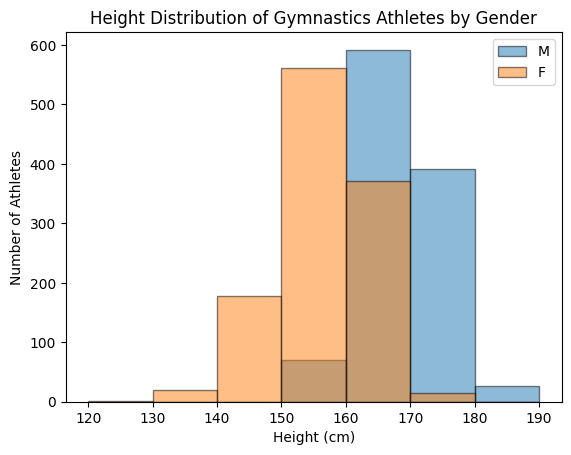

In [155]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create histograms for each gender
for gender in gymnastics_df['Sex'].unique():
    gender_data = gymnastics_df[gymnastics_df['Sex'] == gender]
    n, bins, patches = ax.hist(gender_data['Height'], bins=height_intervals, edgecolor='black', alpha=0.5, label=gender)

# Set labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Number of Athletes')
plt.title('Height Distribution of Gymnastics Athletes by Gender')

# Show legend
plt.legend()

# Show the plot
plt.show()

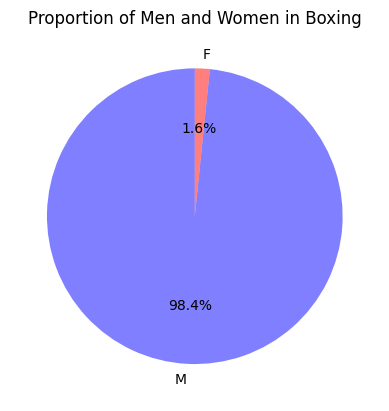

In [156]:
# # See gender balance in Boxing
# Filter DataFrame for Boxing records
boxing_df = athletes[athletes['Sport'] == 'Boxing'].drop_duplicates(["ID"]).dropna(subset=['Height'])

# Count the number of occurrences of each gender in the filtered DataFrame
gender_counts = boxing_df['Sex'].value_counts()

# Create a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['b', 'r'], wedgeprops=dict(alpha=opacity))
plt.title('Proportion of Men and Women in Boxing')
plt.show()

In [157]:
# Get minimum and maximum height for boxing athletes to define the interval
print(f'The tallest athlete in boxing is {boxing_df['Height'].max()} cm tall ({boxing_df['Height'].max()-boxing_df['Height'].mean():.2f} cm taller than average).')
print(f'The shortest athlete in boxing is {boxing_df['Height'].min()} cm tall ({boxing_df['Height'].mean()-boxing_df['Height'].min():.2f} cm shorter than average).')
print(f'The interval for height boxing is: [{boxing_df['Height'].min() // 10 * 10} ; {boxing_df['Height'].max() // 10 * 10 + 10}]')


The tallest athlete in boxing is 208.0 cm tall (35.27 cm taller than average).
The shortest athlete in boxing is 127.0 cm tall (45.73 cm shorter than average).
The interval for height boxing is: [120.0 ; 210.0]


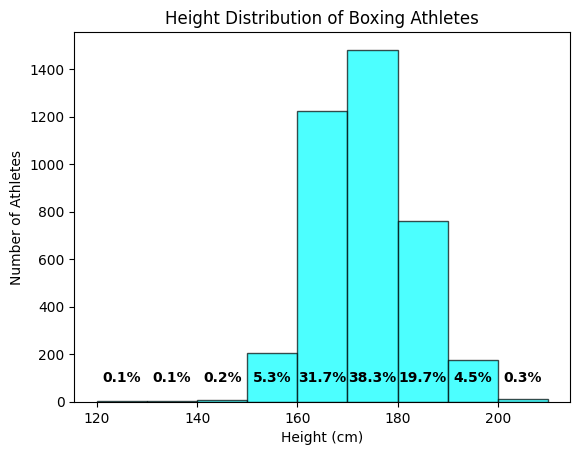

In [158]:
# Define the height intervals
height_intervals = range(120, 220, 10)

# Create a histogram
#plt.hist(gymnastics_df['Height'], bins=height_intervals, edgecolor='black', alpha=0.5, color='green')
n, bins, patches = plt.hist(boxing_df['Height'], bins=height_intervals, edgecolor='black', alpha=0.7, color="cyan")

# Set labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Number of Athletes')
plt.title('Height Distribution of Boxing Athletes')

# Add percentage labels

total_athletes = len(boxing_df)
for percentage, interval, patch in zip(n / total_athletes * 100, bins[:-1], patches):
    plt.text(patch.get_x() + patch.get_width() / 2, 100, f'{percentage:.1f}%', ha='center', va='center', color='black', fontweight='bold')


# Show the plot
plt.show()

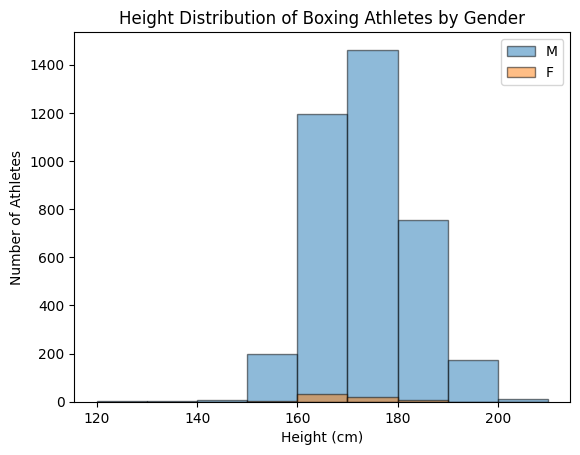

In [159]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create histograms for each gender
for gender in boxing_df['Sex'].unique():
    gender_data = boxing_df[boxing_df['Sex'] == gender]
    n, bins, patches = ax.hist(gender_data['Height'], bins=height_intervals, edgecolor='black', alpha=0.5, label=gender)

# Set labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Number of Athletes')
plt.title('Height Distribution of Boxing Athletes by Gender')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [160]:
# Getting DataFrame for Age in Gymnastics and Figure Skating
gymnastics_age_df = athletes[athletes['Sport'] == 'Gymnastics'].dropna(subset='Age')
fscating_age_df = athletes[athletes['Sport'] == 'Figure Skating'].dropna(subset='Age')

# Group by 'Year' and calculate the minimum age for each sport
min_age_gymnastics = gymnastics_age_df.groupby('Year').apply(lambda x: (x['Age']).min())
min_age_fscating = fscating_age_df.groupby('Year').apply(lambda x: (x['Age']).min())



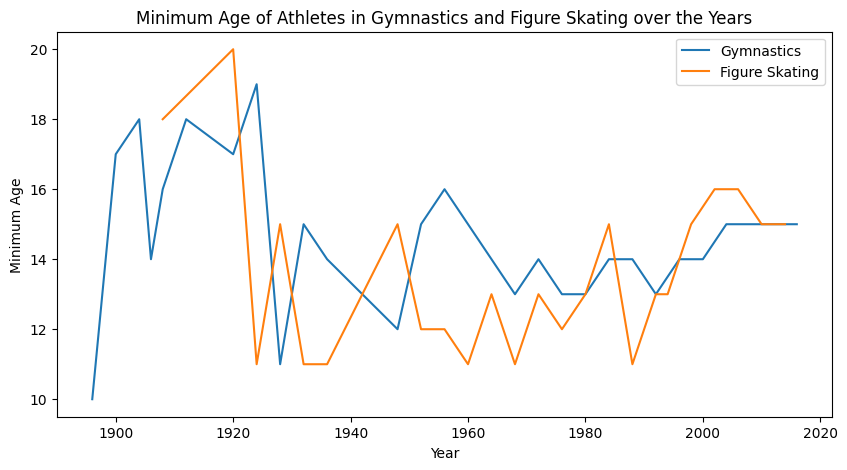

In [161]:

plt.figure(figsize=(10, 5))
# Plotting
plt.xlabel('Year')
plt.ylabel('Minimum Age')
plt.title('Minimum Age of Athletes in Gymnastics and Figure Skating over the Years')

# Plot the line for Gymnastics
min_age_gymnastics.plot(kind='line', label='Gymnastics')

# Plot the line for Figure Skating
min_age_fscating.plot(kind='line', label='Figure Skating')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [162]:

# Group by 'Year' and calculate the minimum age for each sport and gender
min_age_gymnastics = gymnastics_age_df.groupby(['Year', 'Sex'])['Age'].min().unstack()
min_age_fscating = fscating_age_df.groupby(['Year', 'Sex'])['Age'].min().unstack()

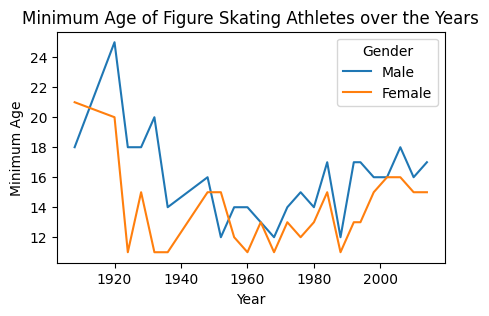

In [163]:
# Plotting for Figure Skating
plt.figure(figsize=(5, 3))

# Plot the lines for Figure Skating (Female and Male)
min_age_fscating['M'].plot(kind='line', label='Male')
min_age_fscating['F'].plot(kind='line', label='Female')

plt.xlabel('Year')
plt.ylabel('Minimum Age')
plt.title('Minimum Age of Figure Skating Athletes over the Years')
plt.legend(title='Gender')

plt.show()

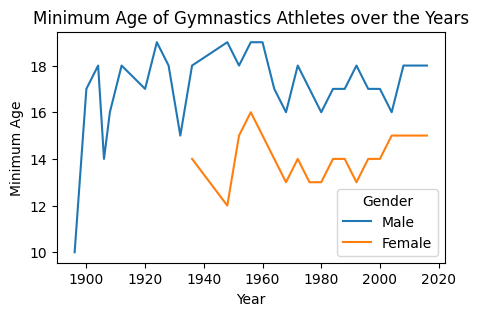

In [164]:
# Plotting for Gymnastics
plt.figure(figsize=(5, 3))

# Group by 'Year' and calculate the minimum age for each gender in Gymnastics
min_age_gymnastics = gymnastics_age_df_sorted.groupby(['Year', 'Sex'])['Age'].min().unstack()

# Plot the lines for Gymnastics (Female and Male)
min_age_gymnastics['M'].plot(kind='line', label='Male')
min_age_gymnastics['F'].plot(kind='line', label='Female')

plt.xlabel('Year')
plt.ylabel('Minimum Age')
plt.title('Minimum Age of Gymnastics Athletes over the Years')
plt.legend(title='Gender')

plt.show()